In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_excel('deliveries.xlsx')

In [3]:
dataset

,Trip,Region,REGA,Parcels,TruckAge,Minutes
0,1,B,0,42,3,489.4
1,2,B,0,46,11,461.9
2,3,A,1,34,9,447.9
3,4,A,1,44,1,506.6
4,5,B,0,30,13,303.0
5,6,A,1,30,7,415.1
6,7,A,1,48,2,546.3
7,8,B,0,32,1,273.1
8,9,B,0,44,7,419.0
9,10,A,1,40,4,486.2


In [4]:
len(dataset)

30

In [5]:
dataset.shape

(30, 6)

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Minutes')

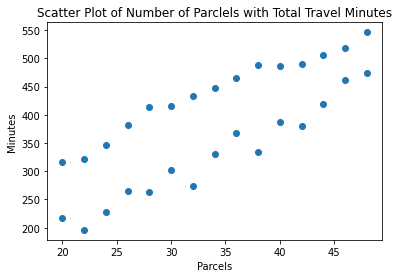

In [7]:
plt.scatter(dataset['Parcels'],dataset['Minutes'])
plt.title("Scatter Plot of Number of Parclels with Total Travel Minutes")
plt.xlabel("Parcels")
plt.ylabel("Minutes")

Text(0, 0.5, 'Minutes')

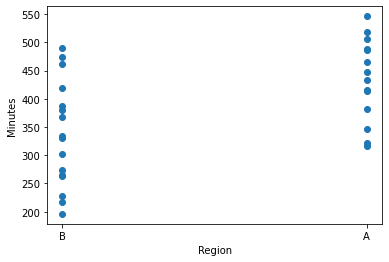

In [8]:
plt.scatter(dataset['Region'],dataset['Minutes'])
plt.xlabel("Region")
plt.ylabel("Minutes")

Text(0, 0.5, 'Minutes')

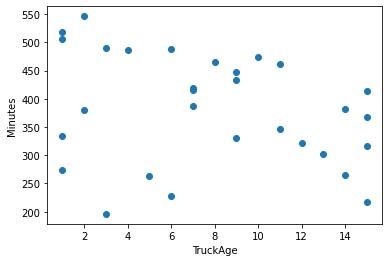

In [9]:
plt.scatter(dataset['TruckAge'],dataset['Minutes'])
plt.xlabel("TruckAge")
plt.ylabel("Minutes")

Text(0, 0.5, 'Minutes')

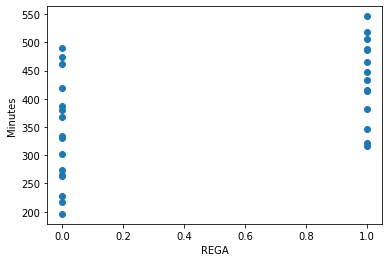

In [10]:
plt.scatter(dataset['REGA'],dataset['Minutes'])

plt.xlabel("REGA")
plt.ylabel("Minutes")

In [11]:
dataset['Region'] = np.where(dataset['Region']=='A',0,1)

In [12]:
dataset

,Trip,Region,REGA,Parcels,TruckAge,Minutes
0,1,1,0,42,3,489.4
1,2,1,0,46,11,461.9
2,3,0,1,34,9,447.9
3,4,0,1,44,1,506.6
4,5,1,0,30,13,303.0
5,6,0,1,30,7,415.1
6,7,0,1,48,2,546.3
7,8,1,0,32,1,273.1
8,9,1,0,44,7,419.0
9,10,0,1,40,4,486.2


In [13]:
dataset.drop(columns=['Trip'])

,Region,REGA,Parcels,TruckAge,Minutes
0,1,0,42,3,489.4
1,1,0,46,11,461.9
2,0,1,34,9,447.9
3,0,1,44,1,506.6
4,1,0,30,13,303.0
5,0,1,30,7,415.1
6,0,1,48,2,546.3
7,1,0,32,1,273.1
8,1,0,44,7,419.0
9,0,1,40,4,486.2


In [14]:
dependant_variable = 'Minutes'
independant_variables = dataset.columns.tolist()

In [15]:
independant_variables.remove(dependant_variable)
independant_variables.remove('Trip')
independant_variables.remove('REGA')

In [16]:
independant_variables

['Region', 'Parcels', 'TruckAge']

In [17]:
x = dataset[independant_variables].values
x

array([[ 1, 42,  3],
       [ 1, 46, 11],
       [ 0, 34,  9],
       [ 0, 44,  1],
       [ 1, 30, 13],
       [ 0, 30,  7],
       [ 0, 48,  2],
       [ 1, 32,  1],
       [ 1, 44,  7],
       [ 0, 40,  4],
       [ 1, 36, 15],
       [ 1, 42,  2],
       [ 1, 38,  1],
       [ 1, 26, 14],
       [ 0, 24, 11],
       [ 0, 22, 12],
       [ 0, 26, 14],
       [ 1, 20, 15],
       [ 0, 38,  6],
       [ 1, 48, 10],
       [ 0, 36,  8],
       [ 0, 28, 15],
       [ 1, 22,  3],
       [ 0, 20, 15],
       [ 1, 34,  9],
       [ 1, 40,  7],
       [ 1, 28,  5],
       [ 1, 24,  6],
       [ 0, 32,  9],
       [ 0, 46,  1]], dtype=int64)

In [18]:
y = dataset[dependant_variable].values
y

array([489.4, 461.9, 447.9, 506.6, 303. , 415.1, 546.3, 273.1, 419. ,
       486.2, 367.7, 380.6, 333.5, 264.9, 347. , 321.3, 381.4, 216.7,
       488.9, 474.4, 464.4, 413.5, 196.1, 315.7, 330.3, 388. , 264.1,
       228.6, 434. , 517.9])

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [20]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0, 34,  9],
       [ 1, 46, 11],
       [ 1, 42,  3],
       [ 1, 32,  1],
       [ 0, 30,  7],
       [ 0, 32,  9]], dtype=int64)

In [22]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
y_pred

array([440.37481992, 454.96903299, 387.60530949, 282.91947282,
       394.25225378, 420.85372974])

In [25]:
test = regressor.predict([[0,42,3]])
test

array([497.21802327])

In [26]:
dataset.head()


,Trip,Region,REGA,Parcels,TruckAge,Minutes
0,1,1,0,42,3,489.4
1,2,1,0,46,11,461.9
2,3,0,1,34,9,447.9
3,4,0,1,44,1,506.6
4,5,1,0,30,13,303.0


In [27]:
import pickle

In [28]:
pickle.dump(regressor,open('deliveries.pkl','wb'))